# IMPORTING LIBRARIES

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn. linear_model import Ridge
from sklearn .metrics import mean_absolute_error
from sklearn .metrics import r2_score
from sklearn .metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# LOADING DATASET

In [51]:
df = pd.read_csv("energydata_complete.csv", error_bad_lines=False)
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# DROP COLUMNS

In [52]:
df1 = df.drop(columns=["date", "lights"])

# NORMALIZE DATA USING MinMaxScalar()

In [53]:
scalar = MinMaxScaler()
normalised_df = pd.DataFrame(scalar.fit_transform(df1), columns=df1.columns)

In [54]:
normalised_df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


# SPLIT DATASET INTO TRAIN AND TEST SET FOR [''T2"] & [''T6'']

In [55]:
x = normalised_df["T2"]
y = normalised_df["T6"]
x_train, x_test, y_train, y_test = train_test_split(x_feature, y_feature, test_size = 0.3, random_state = 42)

# LINEAR REGRESSION MODEL  FOR [''T2"] & [''T6'']

In [56]:
lin_model = LinearRegression()
x_test = x_test.values.reshape(-1, 1)
x_train = x_train.values.reshape(-1, 1)
lin_model.fit(x_train, y_train)
lin_pred = lin_model.predict(x_test)

# COST FUNCTIONS FOR  [''T2"] & [''T6'']

In [57]:
print("R_Squared:", round(r2_score(y_test, lin_pred),2))

R_Squared: 0.64


In [59]:
print("Mean Absolute Error :", round(mean_absolute_error(y_test, predicted_values), 2))

Mean Absolute Error : 0.08


In [60]:
print("Residual Sum of Squares :", round(np.sum(np.square(y_test - predicted_values)), 2))

Residual Sum of Squares : 66.12


In [61]:
print("Root Mean Square Error :", round(np.sqrt(mean_squared_error(y_test, predicted_values)),3))

Root Mean Square Error : 0.106


# LINEAR REGRESSION

In [63]:
x = normalised_df.drop(columns=["Appliances"])
y = normalised_df["Appliances"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
lin_pred = lin_model.predict(x_test)

# REGULARIZATION USING RIDGE REGRSSION

In [64]:
Ridge_model = Ridge(alpha=0.4)
Ridge_model.fit(x_train, y_train)
Ridge_pred = Ridge_model.predict(x_test)

# COST FUNCTION (RMSE) 

In [68]:
print("Linear Root Mean Square Error :", round(np.sqrt(mean_squared_error(y_test, lin_pred)),3))
print("Ridge Root Mean Square Error :", round(np.sqrt(mean_squared_error(y_test, Ridge_pred)),3))

Linear Root Mean Square Error : 0.088
Ridge Root Mean Square Error : 0.088


# REGULARIZATION USING LASSO REGRSSION

In [69]:
Lasso_model = Lasso(alpha=0.001)
Lasso_model.fit(x_train, y_train)
Lasso_pred = Lasso_model.predict(x_test)

# WEIGHTS OF REGRESSION MODELS

In [70]:
def get_weights(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    return weights_df


linear_weights = get_weights(lin_model, x_train, "Linear Regression Weights")
ridge_weights = get_weights(Ridge_model, x_train, "Ridge Regression Weights")
lasso_weights = get_weights(Lasso_model, x_train, "Lasso Regression Weights")

In [71]:
final_weights = pd.merge(linear_weights, ridge_weights, on="Features")
final_weights = pd.merge(final_weights, lasso_weights, on='Features')

In [72]:
final_weights

,Features,Linear Regression Weights,Ridge Regression Weights,Lasso Regression Weights
0,rv1,-2.759603e+10,0.000748,-0.000000
1,RH_2,-4.567008e-01,-0.411071,-0.000000
2,T_out,-3.218684e-01,-0.262172,0.000000
3,T2,-2.361850e-01,-0.201397,0.000000
4,T9,-1.899320e-01,-0.188916,-0.000000
5,RH_8,-1.575972e-01,-0.156830,-0.000110
6,RH_out,-7.768139e-02,-0.054724,-0.049557
7,RH_7,-4.461288e-02,-0.045977,-0.000000
8,RH_9,-3.979516e-02,-0.041367,-0.000000
9,T5,-1.565763e-02,-0.019853,-0.000000


# COST FUNCTION (RMSE)

In [73]:
print("Lasso Root Mean Square Error :", round(np.sqrt(mean_squared_error(y_test, Lasso_pred)),3))

Lasso Root Mean Square Error : 0.094


Text(0.5, 1.0, 'Ridge Regression Distribution')

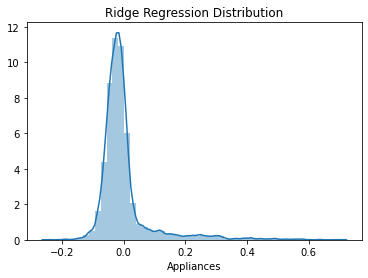

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(y_test - Ridge_pred)
plt.title("Ridge Regression Distribution")

Text(0.5, 1.0, 'Linear Regression Distribution')

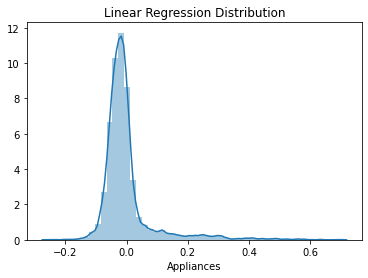

In [80]:
sns.distplot(y_test - lin_pred)
plt.title("Linear Regression Distribution")

Text(0.5, 1.0, 'Lasso Regression Distribution')

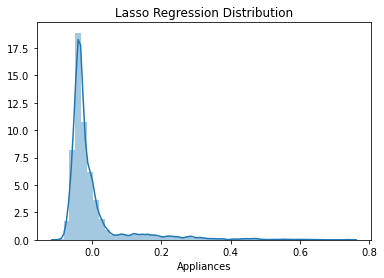

In [81]:
sns.distplot(y_test - Lasso_pred)
plt.title("Lasso Regression Distribution")

# OBSERVATION / CONCLUSION 

## The Root Mean Square Error of the linear regression and ridge regression(at alpha=0.4) are equal. The Root Mean Square Error of the lasso regression(at alpha=0.001) performed worst. Hence, i'll suggest  further cleaning of the data and hyperparameter tuning using optuna or grid search in order to get a lesser RMSE score. 